<a href="https://colab.research.google.com/github/NathanMFE/Huntsman-MFE-/blob/MachineLearning5090/EDAnycsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.core.common import random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Here we will set the theme and a seed for randomization consistency.
sns.set()
rand_state=1000
sns.set_palette("pastel")

In [ ]:
#We will create the df object and assign our data to it.
df = pd.read_csv("nyc-rolling-sales.csv")
#We will save a "backup" copy of the data just in case.
df_raw = df
#The first thing we want to do is take a peek at the data.
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

We will drop the Unnamed: 0  variable and modify the Sale Date variable.

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


unique counts for each variable, and indexing columns


In [ ]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'sale_year', 'sale_month'],
      dtype='object')

In [ ]:
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
sale_year                             2
sale_month                           12
dtype: int64

We will now classify our variables as numeric or categorical. 

We can see obvious categorical variables such as borough,neighborhood, year, etc. as well as numeric

In [ ]:

numerics = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", 
           "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE", 'YEAR BUILT' ]


categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY',
               'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'ZIP CODE', 'BUILDING CLASS AT TIME OF SALE',
               'TAX CLASS AT TIME OF SALE']



In [ ]:
#next we want to make sure that all the variables in our categorical set have
#their types changed into a "category" type
for col in categorical:
    df[col]=df[col].astype("category")

#and now all the variables in our numeric set have their type changed to a
# "Numeric" type
for col in numerics: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,2016,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11


We'll now look at descriptive stats, starting wtih numeric variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,84548.0,4.237219e+03,3.568263e+03,1.0,1322.75,3311.0,6281.0,1.632200e+04
LOT,84548.0,3.762240e+02,6.581368e+02,1.0,22.00,50.0,1001.0,9.106000e+03
RESIDENTIAL UNITS,84548.0,2.025264e+00,1.672104e+01,0.0,0.00,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,84548.0,1.935587e-01,8.713183e+00,0.0,0.00,0.0,0.0,2.261000e+03
TOTAL UNITS,84548.0,2.249184e+00,1.897258e+01,0.0,1.00,1.0,2.0,2.261000e+03
LAND SQUARE FEET,58296.0,3.941676e+03,4.198397e+04,0.0,1650.00,2325.0,3500.0,4.252327e+06
GROSS SQUARE FEET,56936.0,4.045707e+03,3.503249e+04,0.0,1046.75,1680.0,2560.0,3.750565e+06
YEAR BUILT,84548.0,1.789323e+03,5.373450e+02,0.0,1920.00,1940.0,1965.0,2.017000e+03
SALE PRICE,69987.0,1.276456e+06,1.140526e+07,0.0,225000.00,530000.0,950000.0,2.210000e+09


Next with both numeric and categorical variables

In [ ]:
df.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
BOROUGH,84548.0,5.0,4.0,26736.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,84548,11,1,38633,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,84548.0,NaN,NaN,NaN,NaT,NaT,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.0,16322.0
LOT,84548.0,NaN,NaN,NaN,NaT,NaT,376.224015,658.136814,1.0,22.0,50.0,1001.0,9106.0
EASE-MENT,84548,1,,84548,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS AT PRESENT,84548,167,D4,12663,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,84548,67563,131-05 40TH ROAD,210,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APARTMENT NUMBER,84548,3989,,65496,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we'll sum the null values detected above for our variables

In [ ]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64

In [ ]:
#We have NA cells covered, but not blank cells
#categorical variables are treating spaces as objects still 

df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

looks like we have some missingness in the land space variables, sale price, and apartment numbers when accounting for nulls and blanks

We will use a heat map to visualize this

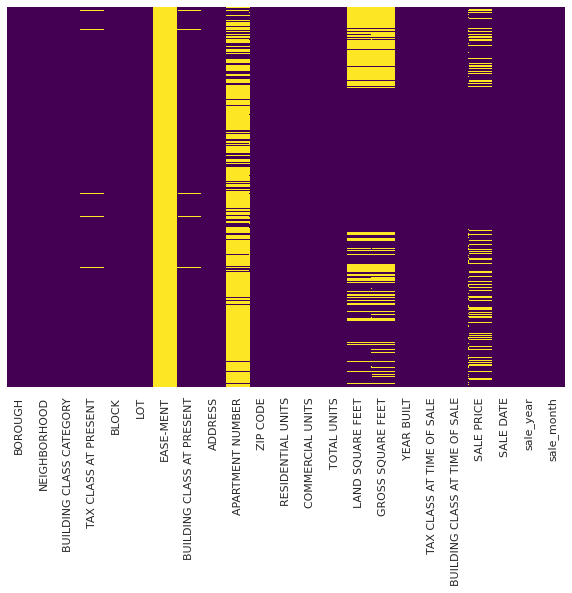

In [ ]:
a

#we can see now that easements and apartment number have a ton of
#missing values and we're going to drop them 
#might be worth exploring if apartment number is assocaited with unmber of units
  #e.g a sale with an apartment number is only 1 unit of residential




Wow! Easement and Apartment number have a ton of missing values, and we've confirmed our suspisions about sqft variables

We'll go ahead and drop Easement & Apartment number, as  well as our NA values


In [ ]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)
#There are a lot of missing values in the data at this point. We don't want them to interfere with our analysis, so we will omit them here.
df=df.dropna()


Now we'll take a look at duplicates and drop them given the 300+ entries


In [ ]:
#Here we will check the remaining data for duplicates.
sum(df.duplicated())
#Because there are almost 350 duplicated entries, we will remove them.
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


We'll create a temporary data set so we can explore and look for quirks without corrupting the data.

In [ ]:
temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47544 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42401 non-null  float64
 4   BLOCK                           47544 non-null  int64  
 5   LOT                             47544 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47544 non-null  int64  
 9   RESIDENTIAL UNITS               47544 non-null  int64  
 10  COMMERCIAL UNITS                47544 non-null  int64  
 11  TOTAL UNITS                     47544 non-null  int64  
 12  LAND SQUARE FEET                

In [ ]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


It seems like some of the data is nonsensical. The Total Units, ZIP code, Year Built, and Sale Price all have 0 values as their min, which can introduce some quirks into the data.

So, we will furtehr investigate the outliers in these variables and visualize them 

In [ ]:
#Sale Price below 10,000 and above 10,000,000: as % of total data:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.24310112737674575

Almost a quarter of our data falls in these extreme bounds, so we will remove them to reduce bias

In [ ]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.592500e+04
mean     8.781402e+05
std      1.033943e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.418810e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


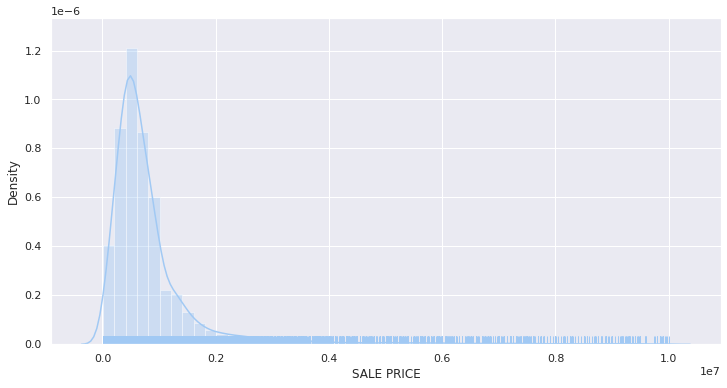

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

Both our plot and sales price descriptive table confirm the heavy right skew of the data

Let's look at the distribution of the data for sale prices just below 4,000,000 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


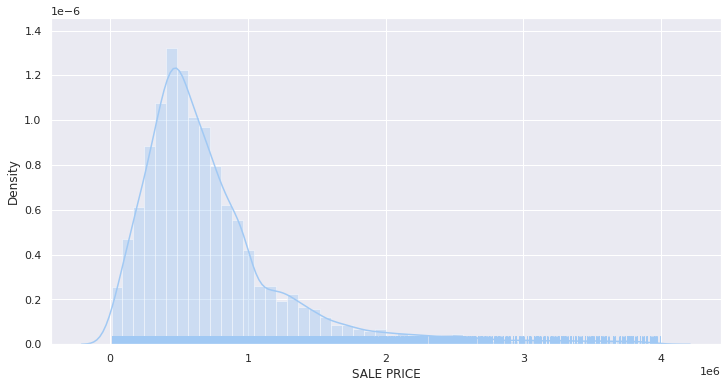

In [ ]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

Getting better!

Now we'll move on to the Year Built variable, specifically looking at those 0 values:

In [ ]:
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1434

There are almost 1500 observations where the Year Built is listed as zero. This doesn't make sense, so we'll remove those from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


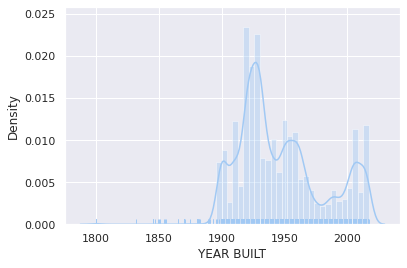

In [ ]:
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

Next we'll examine total units.

In [ ]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3426

Let's remove the observations where no units were involved in the transactions and take a look at the distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


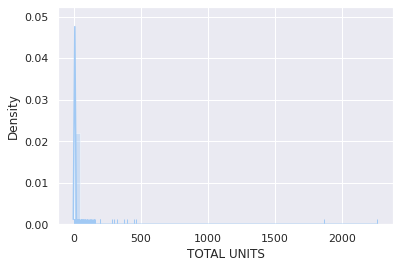

In [ ]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()

In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,30236.0,5418.821835,3753.775464,1.0,2395.0,4836.0,7677.0,16319.0
LOT,30236.0,185.704987,384.518819,1.0,22.0,44.0,83.0,3597.0
RESIDENTIAL UNITS,30236.0,1.970532,12.586963,0.0,1.0,1.0,2.0,1844.0
COMMERCIAL UNITS,30236.0,0.173039,13.034598,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,30236.0,2.147804,18.198705,1.0,1.0,1.0,2.0,2261.0
LAND SQUARE FEET,30236.0,3133.582088,27966.319284,0.0,1816.5,2417.0,3500.0,4228300.0
GROSS SQUARE FEET,30236.0,2440.363276,23800.244758,0.0,1208.0,1680.0,2392.0,3750565.0
YEAR BUILT,30236.0,1946.632160,35.033054,1800.0,1920.0,1935.0,1970.0,2017.0
SALE PRICE,30236.0,793820.011146,594725.186839,10001.0,436000.0,630000.0,940000.0,3995000.0


Finally, we might add a variable to describe our buildings age at the time of sale in 2017 because it is more informative than Year Built and saves us some mental math

In [ ]:
df4['BUILDING AGE'] = 2017 - df4['YEAR BUILT']

Finalizing the data set:

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30236 entries, 3 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TO

Our variables block, lot, and address aren't arbitrary without geolocations which we aren't going to add at this stage, so we'll drop them

In [ ]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

We can convert our borough numbers into their more descriptive names;
1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

In [ ]:
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month,BUILDING AGE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9,104
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9,97
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11,107
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9,118
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8,116


In [ ]:
df_bar=df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


We'll now look at some interesting visualizations of our finalized data

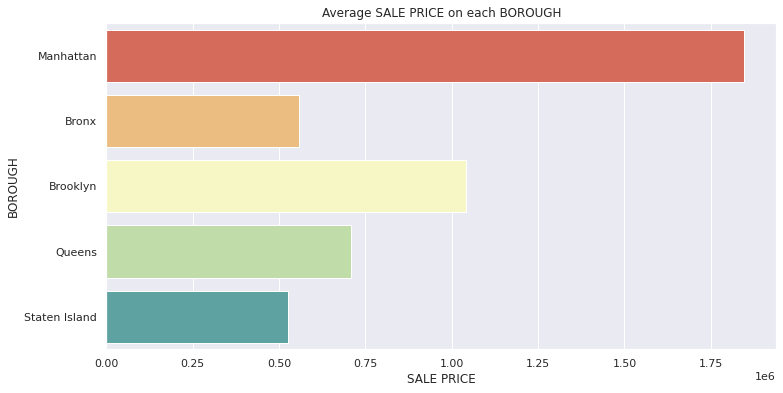

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar, palette='Spectral' )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

We see that homes/ apartments are selling for much higher on average in Manhattan, folllowd by Brooklynn. Staten Island and the Bronx have comparably low average sale prices

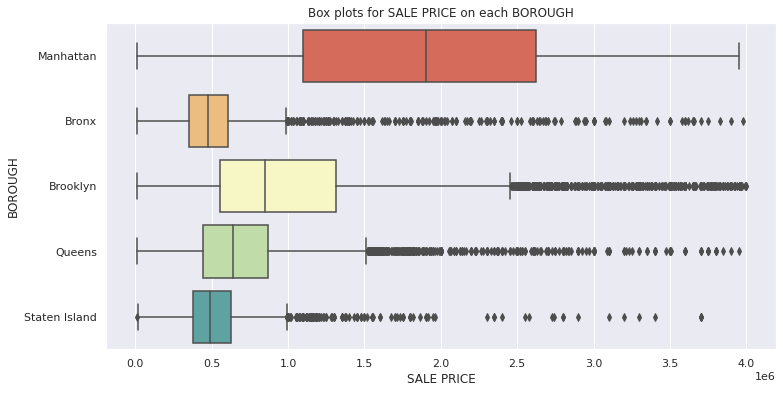

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df4, palette='Spectral')
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

Sales in Manhattan follow the most normal distribution, while our other buroughs have many more upper bound outliers. 

In [ ]:
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,2432
1,2,2323
2,3,2782
3,4,2344
4,5,2565
5,6,2931
6,7,2328
7,8,1937
8,9,2807
9,10,2373


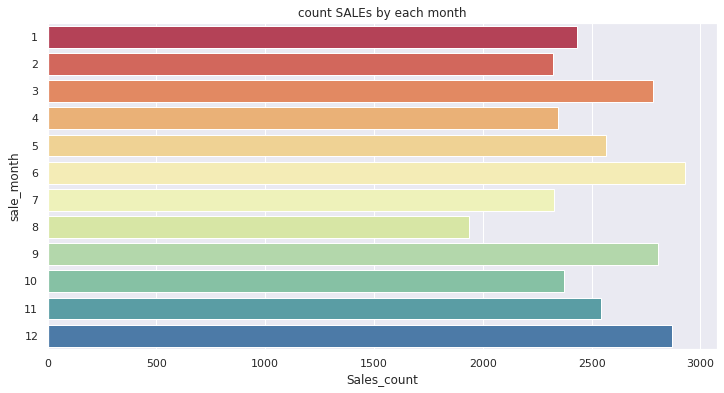

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar, palette='Spectral' )
plt.title('count SALEs by each month')
plt.show()

We're not seeing a strong seasonality for home prices, but might be seeing a recurring pattern of price spikes every 3 months. Sale prices are highest in March, June, September, and December. End of quarter bonuses go a long way in the Big Apple!

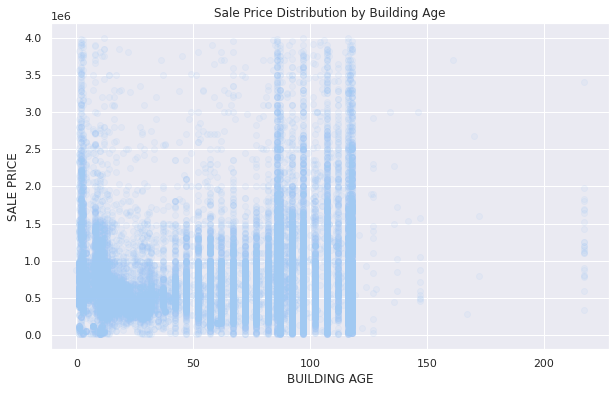

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=df4, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

The above distribution might tell us something about the NYC real estate market, with the highest sale prics occuring for new buildings or old (>100). They might represent established commercial properties, or fixer uppers?

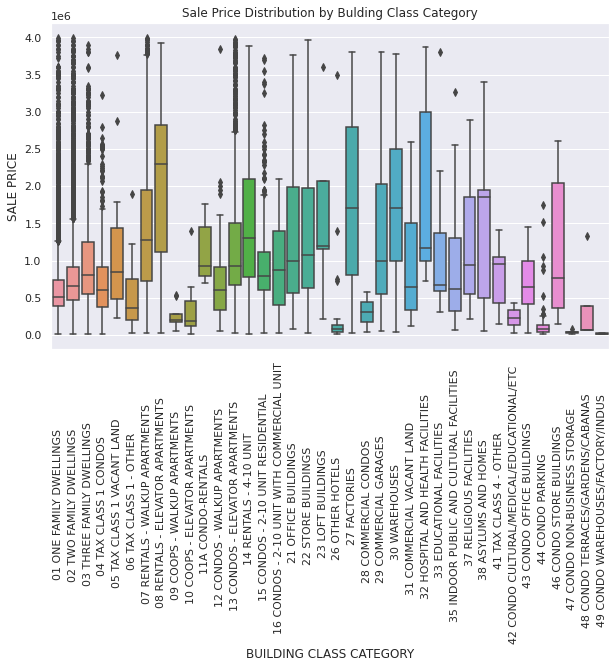

In [ ]:
plt.figure(figsize=(10,6))
order = sorted(df4['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df4, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

While a bit dense, our last visualation shows us sale price distribution by building class. As we might expect the average price of commercial, capital intensive real estate like factories, hospitals, etc. is higher. 

We also see a huge number of outliers in single-family homes and elevator apartments, the latter of which sells for more than walk-ups. 

In [ ]:
%%shell
jupyter nbconvert --to html /content/EDAnycsales.ipynb

[NbConvertApp] Converting notebook /content/EDAnycsales.ipynb to html
[NbConvertApp] Writing 847768 bytes to /content/EDAnycsales.html
